In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

(256, 256)


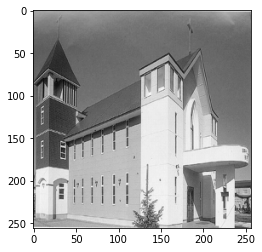

In [10]:
path='/Users/kuangtinghsiao/python/CVMalason100/House256.bmp'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, cmap='gray')

In [14]:
# normalize img
img_nor=img/255
#reshape img
img_nor=img_nor.reshape(img.shape[0]*img.shape[1],)
print('shape of img = {}'.format(img_nor.shape))

shape of img = (65536,)


(array([1.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 6.000e+00, 5.000e+00,
        1.500e+01, 6.000e+00, 9.000e+00, 0.000e+00, 7.000e+00, 8.000e+00,
        9.000e+00, 8.000e+00, 1.500e+01, 1.200e+01, 5.000e+00, 1.100e+01,
        0.000e+00, 1.000e+01, 1.800e+01, 1.900e+01, 2.600e+01, 2.100e+01,
        2.500e+01, 2.600e+01, 2.300e+01, 2.200e+01, 0.000e+00, 2.100e+01,
        2.300e+01, 2.200e+01, 2.700e+01, 2.400e+01, 3.400e+01, 3.600e+01,
        3.200e+01, 0.000e+00, 4.300e+01, 6.100e+01, 6.100e+01, 6.200e+01,
        7.900e+01, 1.060e+02, 1.130e+02, 1.110e+02, 1.230e+02, 0.000e+00,
        1.250e+02, 1.300e+02, 1.520e+02, 1.260e+02, 1.120e+02, 1.510e+02,
        1.400e+02, 1.350e+02, 0.000e+00, 1.350e+02, 1.410e+02, 1.720e+02,
        1.630e+02, 1.670e+02, 1.550e+02, 1.500e+02, 1.620e+02, 1.510e+02,
        0.000e+00, 1.510e+02, 1.420e+02, 1.480e+02, 1.440e+02, 1.200e+02,
        1.520e+02, 1.660e+02, 1.520e+02, 0.000e+00, 1.490e+02, 1.420e+02,
        1.740e+02, 1.680e+02, 1.870e+0

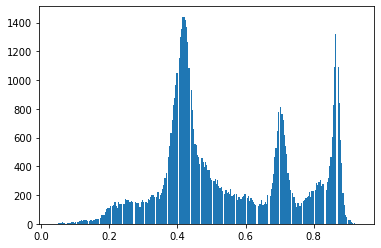

In [16]:
#觀察柱狀圖分佈
plt.hist(img_nor, 255)

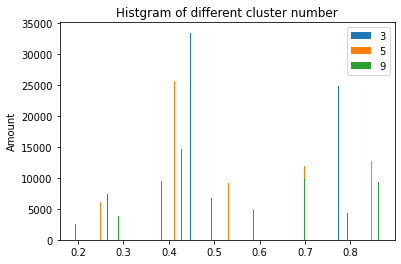

In [40]:
#kmeans cluster

cluster_number=[3,5,9]
img_new={}
for number in cluster_number:
    kmean = KMeans(number)
    kmean.fit(img_nor.reshape(-1,1))
    img_new[number]=kmean.cluster_centers_[kmean.predict(img_nor.reshape(-1,1))]

    #plot histogram
    plt.hist(img_new[number], 255, label=number)
    plt.legend()
    plt.title('Histgram of different cluster number')
    plt.ylabel('Amount')


In [41]:
cluster_number=[3,5,9]
#plot 

for number in cluster_number: 
    img_new[number]= img_new[number]*255
    img_new[number]= img_new[number].reshape(img.shape[0], img.shape[1])



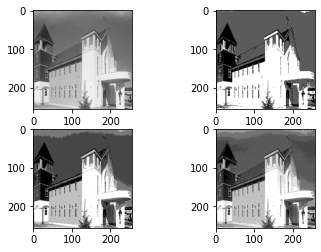

In [39]:
fig, axes= plt.subplots(2,2)
axes[0,0].imshow(img, cmap='gray')
axes[0,1].imshow(img_new[3], cmap='gray')
axes[1,0].imshow(img_new[5], cmap='gray')
axes[1,1].imshow(img_new[9], cmap='gray')